In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn import tree

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("Diabetes.csv", header=None, names=col_names )
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['pregnant', 'glucose', 'bp','insulin', 'bmi', 'pedigree', 'age']
x = pima[feature_cols]
y = pima.label

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 11)
x_train

,pregnant,glucose,bp,insulin,bmi,pedigree,age
409,1,172,68,579,42.4,0.702,28
63,2,141,58,128,25.4,0.699,24
61,8,133,72,0,32.9,0.270,39
405,2,123,48,165,42.1,0.520,26
747,1,81,74,57,46.3,1.096,32
...,...,...,...,...,...,...,...
269,2,146,0,0,27.5,0.240,28
337,5,115,76,0,31.2,0.343,44
91,4,123,80,176,32.0,0.443,34
80,3,113,44,0,22.4,0.140,22


In [8]:
# create dt
tt = tree.DecisionTreeClassifier()
tt = tt.fit(x_train, y_train)

In [9]:
y_pred = tt.predict(x_test)
print("Accuracy of the tree with raw data:", metrics.accuracy_score(y_test, y_pred))

Accuracy of the tree with raw data: 0.6926406926406926


In [10]:
#text = tree.export_text(tt)
#print(text)

In [78]:
#fig,ax = plt.subplots(figsize=(60,60))
#tree.plot_tree(tt,fontsize=12)
#plt.show()

In [8]:
Accu =[]
for i in range(1,10):
    tre = tree.DecisionTreeClassifier(max_depth = i)
    tre = tre.fit(x_train, y_train)
    y_pred = tre.predict(x_test)
    accuracy_i = metrics.accuracy_score(y_test, y_pred)
    Accu.append(accuracy_i)
    print("depth=",i,"\nAccuracy:", accuracy_i)
    print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))

depth= 1 
Accuracy: 0.7272727272727273
Confusion Matrix: [[134  15]
 [ 48  34]]
depth= 2 
Accuracy: 0.7272727272727273
Confusion Matrix: [[134  15]
 [ 48  34]]
depth= 3 
Accuracy: 0.7272727272727273
Confusion Matrix: [[134  15]
 [ 48  34]]
depth= 4 
Accuracy: 0.70995670995671
Confusion Matrix: [[132  17]
 [ 50  32]]
depth= 5 
Accuracy: 0.7662337662337663
Confusion Matrix: [[121  28]
 [ 26  56]]
depth= 6 
Accuracy: 0.7575757575757576
Confusion Matrix: [[132  17]
 [ 39  43]]
depth= 7 
Accuracy: 0.7186147186147186
Confusion Matrix: [[133  16]
 [ 49  33]]
depth= 8 
Accuracy: 0.7186147186147186
Confusion Matrix: [[132  17]
 [ 48  34]]
depth= 9 
Accuracy: 0.7229437229437229
Confusion Matrix: [[129  20]
 [ 44  38]]


Text(0, 0.5, 'accuracies')

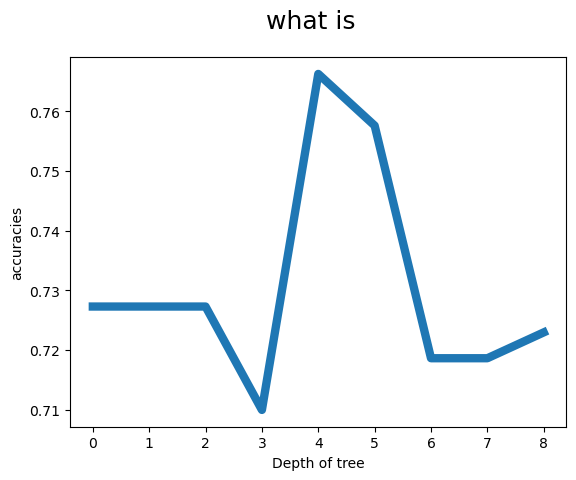

In [9]:
fig = plt.figure()
plt.plot(Accu, linewidth=6)
fig.suptitle("what is",fontsize = 18)
plt.xlabel("Depth of tree")
plt.ylabel("accuracies")

In [38]:
Accu

[0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.70995670995671,
 0.7575757575757576,
 0.7532467532467533,
 0.7186147186147186,
 0.7272727272727273,
 0.7272727272727273]

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
titanic = pd.read_csv("titanic.csv")
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
x = titanic[features]
y = titanic['Survived']


In [12]:
x = pd.get_dummies(x, columns=['Sex','Embarked'], drop_first=True) #turn categorical into numerical
x['Age'] = x['Age'].fillna(x['Age'].mean())

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
dc = DecisionTreeClassifier(random_state = 42)
dc.fit(x_train, y_train)
y_pred = dc.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
print("Accuracy:",accuracy)

Accuracy: 0.7932960893854749


In [18]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


In [27]:
print(f"Accuracy: {accuracy:.2%}")
print(f"Confusion Matrix:{confusion}")
print(f"Classification Report:{classification_rep}")

Accuracy: 79.33%
Confusion Matrix:[[89 16]
 [21 53]]
Classification Report:              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [29]:
#drop a column
kaka = titanic.drop('Survived', axis =1)
print(kaka.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
########random forest
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
iris = sns.load_dataset("iris")
print("Data Type",type(iris))
print("Dimension:",iris.shape)

Data Type <class 'pandas.core.frame.DataFrame'>
Dimension: (150, 5)


In [54]:
#sns.pairplot(iris, hue="species"）

In [18]:
iris_features = iris.drop("species",axis=1)
iris_label = iris["species"]

In [19]:
feature_train, feature_test, label_train, label_test=train_test_split( iris_features, iris_label, test_size=0.3,
                                                                      stratify=iris_label, random_state =1)

In [20]:
count_train = np.unique(label_train, return_counts=True)
count_test = np.unique(label_test, return_counts=True)
print(f"train label: {count_train[0]}={count_train[1]}\n test label: {count_test[0]}={count_test[1]}")

train label: ['setosa' 'versicolor' 'virginica']=[35 35 35]
 test label: ['setosa' 'versicolor' 'virginica']=[15 15 15]


In [21]:
#using the randomforest algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1, oob_score=True)
rf.fit(feature_train, label_train)
print(rf.oob_score_)

0.9428571428571428


In [22]:
#model evaluation
#10-fold validation
from sklearn.model_selection import cross_val_score
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
print("oob_score=", "%.4f" %rf.oob_score_)

oob_score= 0.9429


In [23]:
cv_score = cross_val_score(rf, feature_train, label_train, cv=10)
print(cv_score)
print("10 fold cross validation score=", "%.4f" % np.mean(cv_score))

[1.00 1.00 1.00 0.91 0.91 1.00 0.90 0.90 0.90 0.90]
10 fold cross validation score= 0.9418


In [24]:
#testing performance
test_score = rf.score(feature_test, label_test)
print("Testing performance:","%.4f"%test_score)

Testing performance: 0.9778


In [25]:
prediction = rf.predict(feature_test)
count_pred = np.unique(prediction, return_counts=True)
print('Pred labels=', count_pred[0],"=",count_pred[1])

Pred labels= ['setosa' 'versicolor' 'virginica'] = [15 16 14]


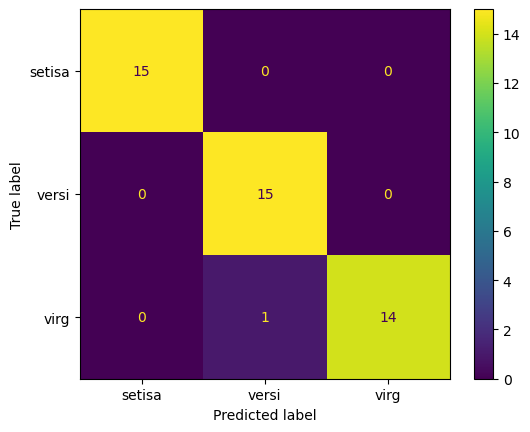

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion matrix
conf_matrix = confusion_matrix(label_test, prediction)
#plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['setisa','versi','virg'])
disp.plot()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(label_test, prediction, target_names=['s','ver','virg']))

              precision    recall  f1-score   support

           s       1.00      1.00      1.00        15
         ver       0.94      1.00      0.97        15
        virg       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
#feature importance
iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
implist = list(rf.feature_importances_)
features_list = iris_features.columns

In [34]:
# to present them all
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(features_list, implist)]
feature_sot = sorted(feature_importances, key= lambda x: x[1], reverse=True) #从第二列排序
for pair in feature_sot:
    print("Variable: {:30} Importance:{}".format(*pair))

Variable: petal_length                   Importance:0.37
Variable: petal_width                    Importance:0.34
Variable: sepal_length                   Importance:0.26
Variable: sepal_width                    Importance:0.03


In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
x_values = list(range(len(implist)))
x_values

[0, 1, 2, 3]

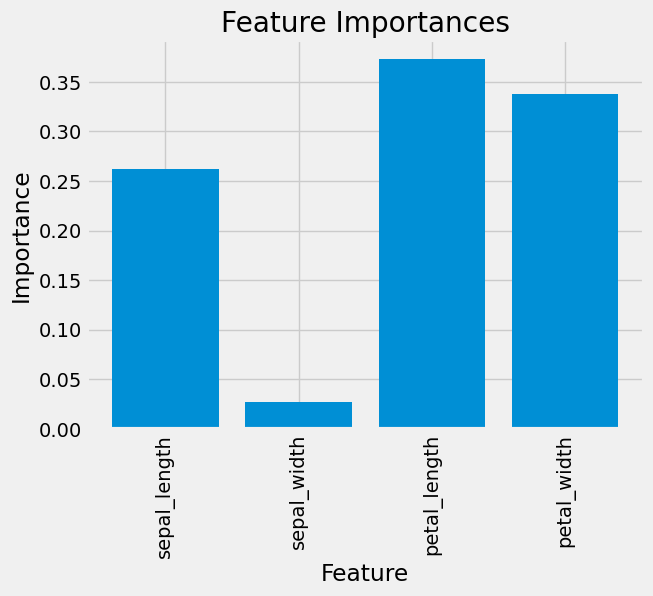

In [39]:
plt.bar(x_values, implist, orientation ='vertical')
plt.xticks(x_values, features_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

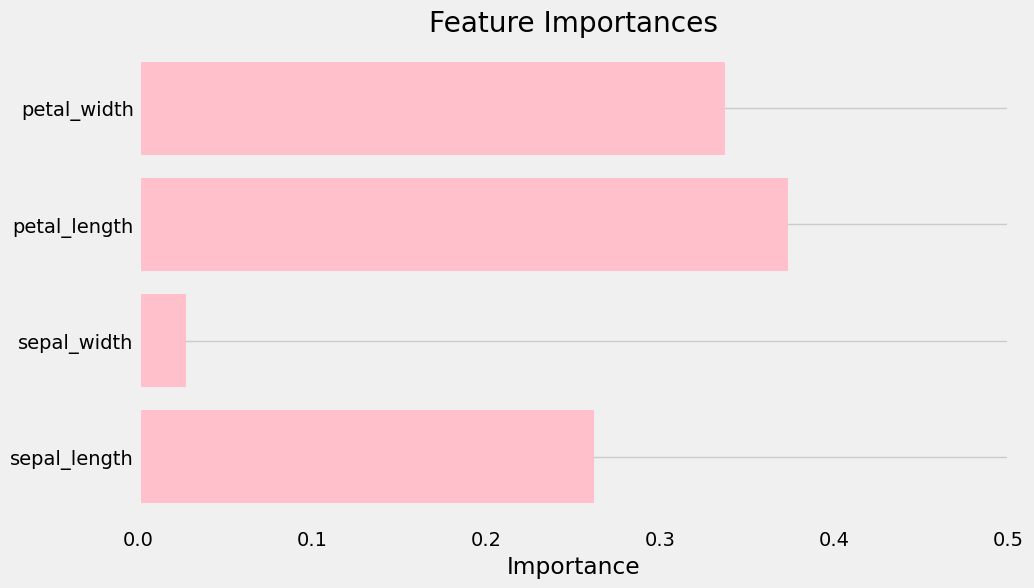

In [49]:
plt.figure(figsize=(10,6))
plt.barh(features_list, implist, color ='pink') #先y轴数据，再x轴
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.xlim(0,0.5)
plt.grid(axis='x')
plt.show()

In [52]:
#add noise
random_state = np.random.RandomState(1)
n_samples = iris_features.shape[0]
dummy_var = []
for i in range(1,101):
    dummy_var.append("col" + str(i))
random_features = pd.DataFrame (columns=dummy_var, data = random_state.rand(n_samples,100))

In [54]:
new_iris_features = iris_features.copy()
new_iris_features = pd.concat([new_iris_features, random_features], axis=1)
print(new_iris_features.shape)

(150, 104)


In [55]:
new_train_features, new_test_features, new_train_labels, new_test_labels=train_test_split(
    new_iris_features, iris_label,
    test_size=0.3, stratify = iris_label, random_state = 1)

In [61]:
#new random 
new_rf = RandomForestClassifier (n_estimators=10, random_state=1, oob_score =True)
new_rf.fit(new_train_features, new_train_labels)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=1)

In [63]:
#model evaluation
print('oob score =', "%.4f"%new_rf.oob_score_)
new_cv_score = cross_val_score(new_rf, new_train_features, new_train_labels, cv=10)
print("10-fold cross validation score=", "%.4f"%np.mean(new_cv_score))

oob score = 0.6762
10-fold cross validation score= 0.8955


In [65]:
#testing performance
new_test_score = new_rf.score(new_test_features, new_test_labels)
print("new test score: ","%.4f"%new_test_score)

new test score:  0.8889


In [66]:
new_prediction = new_rf.predict(new_test_features)
new_prediction

array(['virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [67]:
#数数的代码，看各种种类出现了多少次
new_count_pred = np.unique(new_prediction, return_counts=True)
print("predicted labels:", new_count_pred[0], "=", new_count_pred[1])

predicted labels: ['setosa' 'versicolor' 'virginica'] = [19 12 14]


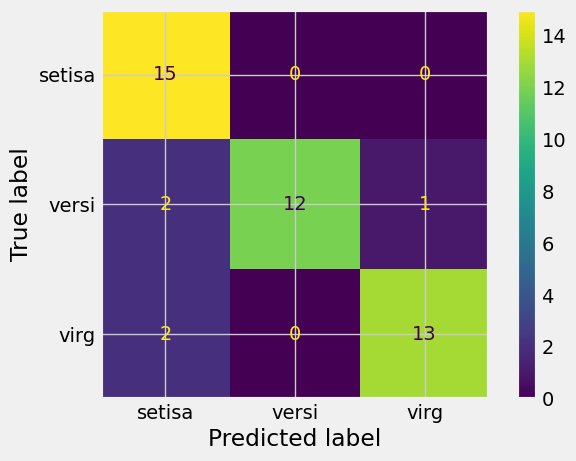

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion matrix
new_conf_matrix = confusion_matrix(new_test_labels, new_prediction)
#plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix = new_conf_matrix, display_labels=['setisa','versi','virg']).plot()

In [69]:
#testing performance report
print(classification_report(new_test_labels, new_prediction, target_names=['setosa','versi','virgi']))

              precision    recall  f1-score   support

      setosa       0.79      1.00      0.88        15
       versi       1.00      0.80      0.89        15
       virgi       0.93      0.87      0.90        15

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.91      0.89      0.89        45



In [71]:
#feature importance rf.feature_importances_
new_feature_list = new_iris_features.columns
new_importances = list(new_rf.feature_importances_)

In [77]:
new_feature_importances = [(feature, round(importance,2)) 
                           for feature, importance in zip(new_feature_list, new_importances)]
new_feature_importances = sorted(new_feature_importances, key=lambda x: x[1], reverse=True)
for i in new_feature_importances[:5]:
    print("Variable: {:22} Importance:{}".format(*i))

Variable: petal_length           Importance:0.17
Variable: sepal_length           Importance:0.12
Variable: petal_width            Importance:0.12
Variable: col50                  Importance:0.03
Variable: col24                  Importance:0.02


In [78]:
#change the estimator
import matplotlib.pyplot as plt
score_array_train =[]
score_array_test =[]
num =[]
for k in range(1,1001,50):
    clf=RandomForestClassifier(n_estimators=k, random_state=1, max_depth=3)
    clf.fit(new_train_features, new_train_labels)
    score_array_train.append(clf.score(new_train_features, new_train_labels))
    score_array_test.append(clf.score(new_test_features, new_test_labels))
    num.append(k)

Text(0, 0.5, 'Testing Accuracy')

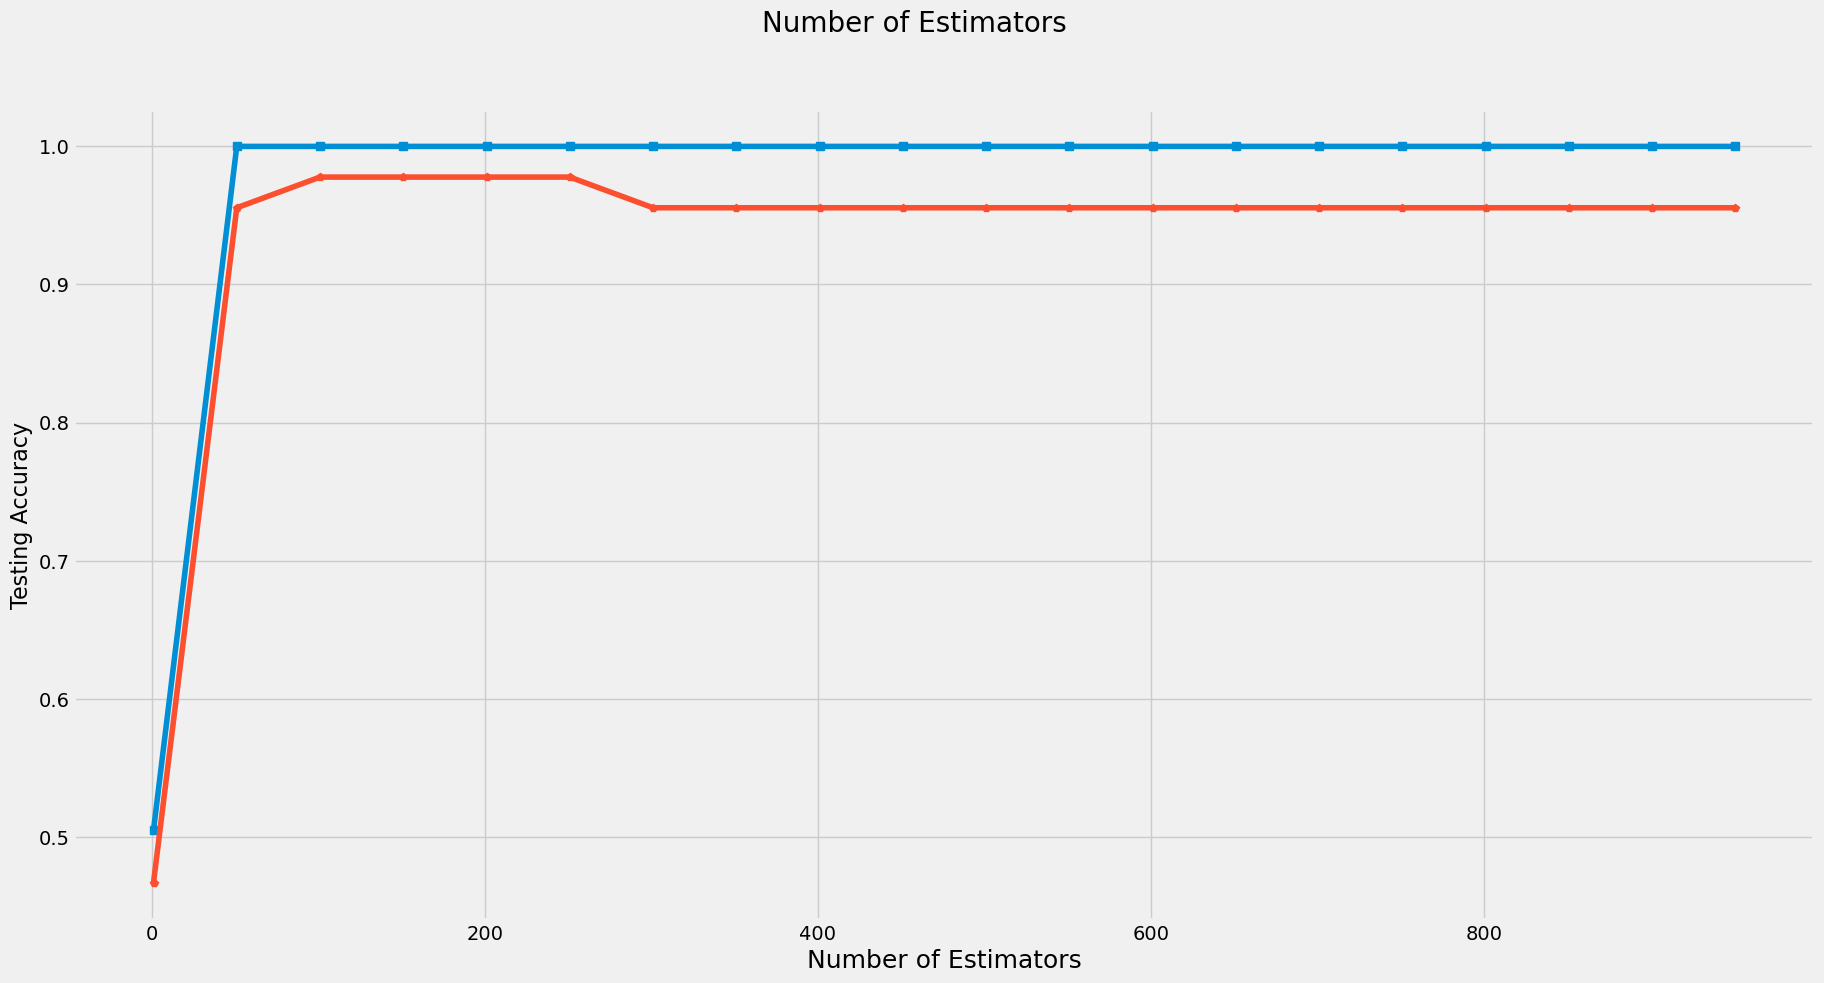

In [86]:
plt.figure(figsize=(20,10))
plt.plot(num, score_array_train, marker='s')
plt.plot(num, score_array_test, marker='p')
plt.suptitle('Number of Estimators', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=18)
plt.ylabel('Testing Accuracy', fontsize=16)

In [89]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
x,y = make_classification(n_samples=100000, n_features=20, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
p_start = time.time()
parallel_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
parallel_rf.fit(x_train,y_train)
p_end = time.time()
ptime = p_end-p_start

s_start = time.time()
sequential_rf = RandomForestClassifier(n_estimators=100, random_state=42)
sequential_rf.fit(x_train, y_train)
s_end = time.time()
stime= s_end-s_start

p_accuracy = parallel_rf.score(x_test, y_test)
s_accuracy = sequential_rf.score(x_test, y_test)
print(f"Parallel time: {ptime:.2f}, accuracy:{p_accuracy:.2%}")
print(f"Sequential time: {stime:.2f}, accuracy:{s_accuracy:.2%}")

Parallel time: 108.70, accuracy:95.04%
Sequential time: 237.56, accuracy:95.04%
